# Sentiment Analysis 

### Problem Statement
* This project  is about Sentiment Analysis on Yelp Reviews.
    
* **Keywords:** Sentiment Analysis, Linear Regression, Polarity, Subjectivity

In [8]:
#import required libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

### Methodology

The pandas library was used to load the dataset from a text file into a DataFrame, which is a common practice in handling structured data in Python. Data Cleaning and Feature Engineering was completed using pandas to create new columns for polarity, subjectivity, and review length by applying functions to the existing data.

The TextBlob library was used to perform sentiment analysis on the review text, extracting polarity and subjectivity scores. This is a form of natural language processing (NLP), which is crucial in big data for analyzing text data.

 * Model 1
    * Sentiment Analysis
 
 * Model 2
    * Linear Regression
 

#### Loading the dataset and adding additional columns for the sentiment classification as positive, negative, or neutral:

In [7]:
# Load the data into a DataFrame
file_path = 'downloads\yelp_labelled.txt'
df = pd.read_csv(file_path, delimiter='\t', header=None, names=['review', 'label'])

# Function to calculate sentiment using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to each review and create new columns for polarity and subjectivity
df[['polarity', 'subjectivity']] = df['review'].apply(lambda x: pd.Series(get_sentiment(x)))

# Function to classify review as positive, negative, or neutral. 
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to the polarity column
df['sentiment'] = df['polarity'].apply(classify_sentiment)

# Show the DataFrame with the new columns
print(df.head())

# Save the DataFrame to a new CSV file (optional)
df.to_csv('yelp_reviews_with_sentiment.csv', index=False)


                                              review  label  polarity  \
0                           Wow... Loved this place.      1      0.40   
1                                 Crust is not good.      0     -0.35   
2          Not tasty and the texture was just nasty.      0     -1.00   
3  Stopped by during the late May bank holiday of...      1      0.20   
4  The selection on the menu was great and so wer...      1      0.80   

   subjectivity sentiment  
0          0.90  positive  
1          0.60  negative  
2          1.00  negative  
3          0.70  positive  
4          0.75  positive  


In [9]:
df.head()

review  label  polarity  \
0                           Wow... Loved this place.      1      0.40   
1                                 Crust is not good.      0     -0.35   
2          Not tasty and the texture was just nasty.      0     -1.00   
3  Stopped by during the late May bank holiday of...      1      0.20   
4  The selection on the menu was great and so wer...      1      0.80   

   subjectivity sentiment  
0          0.90  positive  
1          0.60  negative  
2          1.00  negative  
3          0.70  positive  
4          0.75  positive

#### Exploratory Data Analysis

#### Data Overview and Summary Statistics
Let's check the basic information about the dataset including data types and missing values.

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review        1000 non-null   object 
 1   label         1000 non-null   int64  
 2   polarity      1000 non-null   float64
 3   subjectivity  1000 non-null   float64
 4   sentiment     1000 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB
None


In [12]:
print(df.describe())

            label     polarity  subjectivity
count  1000.00000  1000.000000   1000.000000
mean      0.50000     0.155010      0.509047
std       0.50025     0.463381      0.335616
min       0.00000    -1.000000      0.000000
25%       0.00000     0.000000      0.250000
50%       0.50000     0.054167      0.554167
75%       1.00000     0.500000      0.750000
max       1.00000     1.000000      1.000000


#### Distribution of Sentiments
Let's plot the distribution of sentiments

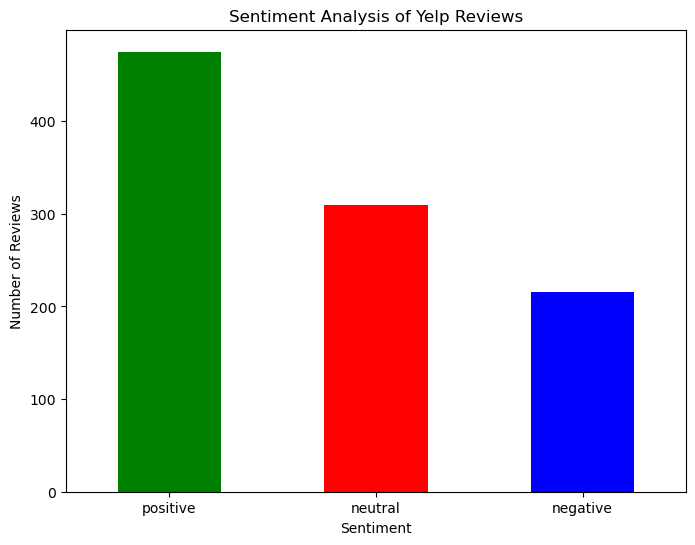

In [13]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Yelp Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

#### Review Length Analysis

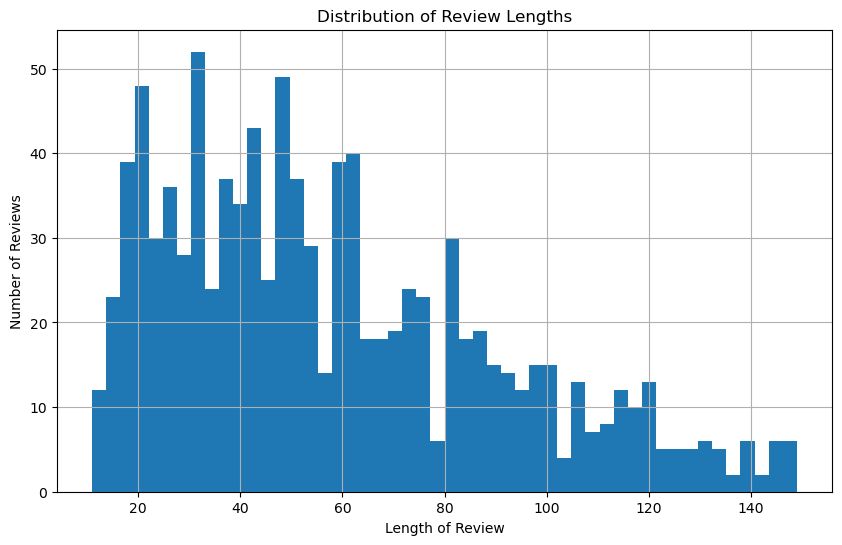

In [14]:
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(10, 6))
df['review_length'].hist(bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Number of Reviews')
plt.show()

#### Polarity and Subjectivity Analysis
Let's plot the distribution of polarity scores.

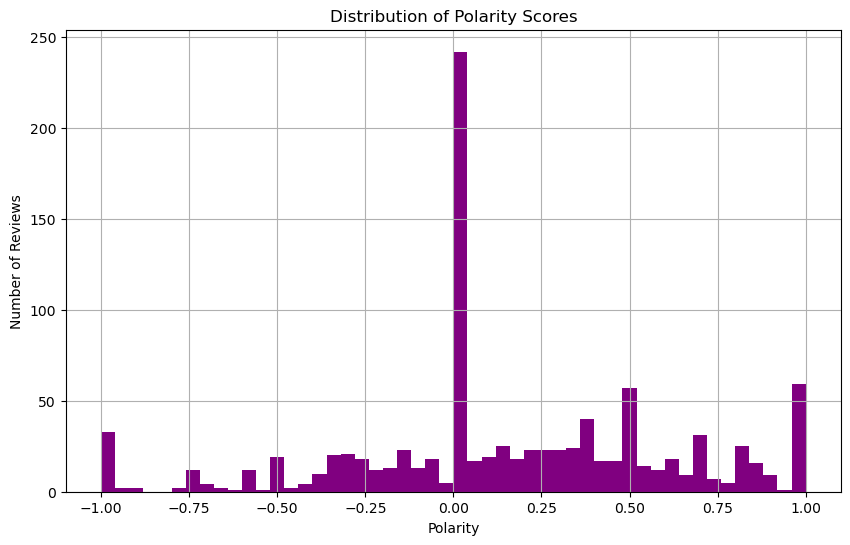

In [16]:
plt.figure(figsize=(10, 6))
df['polarity'].hist(bins=50, color='purple')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.show()

Subjectivity Distribution: Plot the distribution of subjectivity scores.

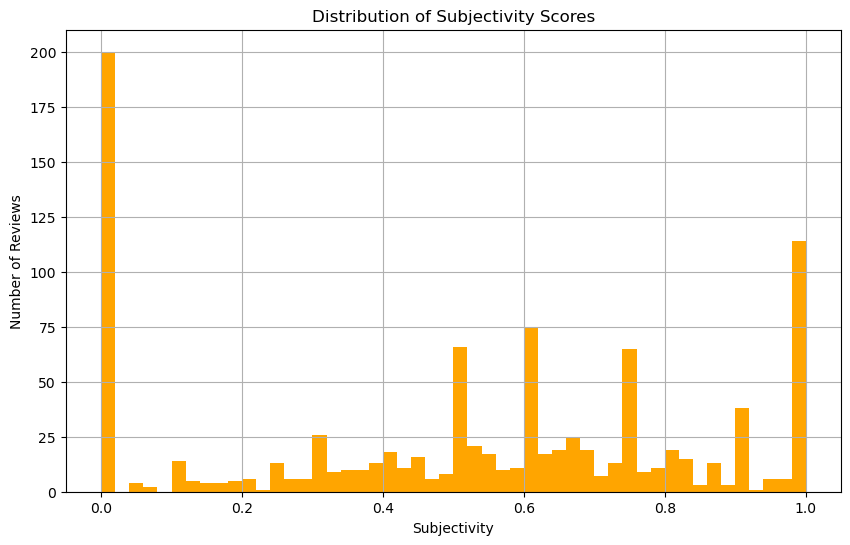

In [17]:
plt.figure(figsize=(10, 6))
df['subjectivity'].hist(bins=50, color='orange')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Number of Reviews')
plt.show()

Sentiment vs. Review Length
- Box Plot of Review Length by Sentiment

<Figure size 1000x600 with 0 Axes>

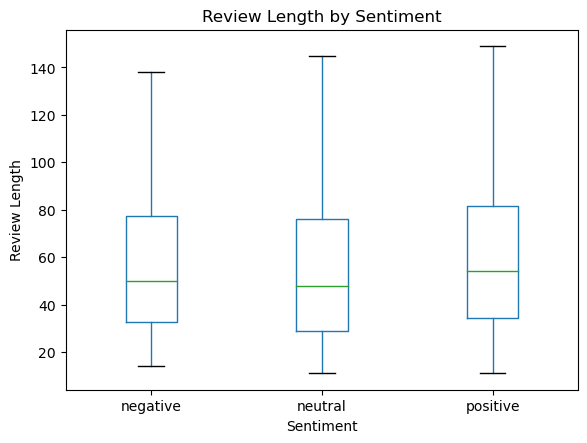

In [18]:
plt.figure(figsize=(10, 6))
df.boxplot(column='review_length', by='sentiment', grid=False, showfliers=False)
plt.title('Review Length by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

#### Word Clouds for Different Sentiments: 
- Let's create word clouds to visualize the most common words in positive, negative, and neutral reviews.

In [22]:
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])
neutral_reviews = ' '.join(df[df['sentiment'] == 'neutral']['review'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()


#### Correlation Between Polarity and Subjectivity: Check if there's any correlation between the polarity and subjectivity scores.

In [23]:
correlation = df[['polarity', 'subjectivity']].corr()
print(correlation)

              polarity  subjectivity
polarity      1.000000      0.141963
subjectivity  0.141963      1.000000


#### Part 2 - Machine Learning
**We can perform linear regression with this dataset. Here are a few potential purposes for using linear regression with this dataset:**
- Predicting Review Length Based on Sentiment
- Analyzing Relationship Between Polarity and Subjectivity

In this example, we can predict the Review Length based on sentiment

steps: 
1. Step-by-Step Implementation
2. Train a Linear Regression Model
3. Evaluate the Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Prepare the feature matrix X and the target vector y
X = df[['polarity', 'subjectivity']]
y = df['review_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1057.890844329203
R² Score: -0.01867010963504545


In [29]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal fit')
plt.xlabel('Actual Review Length')
plt.ylabel('Predicted Review Length')
plt.title('Actual vs Predicted Review Length')
plt.xlim(40, 80)
plt.ylim(40, 80)
plt.legend()
plt.show()

### Conclusions


By performing linear regression, we can gain insights into how well the sentiment features (polarity and subjectivity) can predict the length of reviews. 

The Mean Squared Error (MSE) Indicates the average squared difference between the actual and predicted review lengths. A lower MSE indicates a better fit.

The R² Score Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score closer to 1 indicates a better fit.

The high MSE combined with the negative R² score indicates that the linear regression model is not a good fit for predicting review lengths based on polarity and subjectivity.

The low R² score, particularly being negative, implies that the model is not capturing any meaningful relationship and might even be less useful than simply using the average review length as the prediction.